<a href="https://colab.research.google.com/github/josetaco/Proyectos/blob/main/Proyecto_N%C2%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema N°1

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
from google.colab import files
import math
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Importamos la base de datos Autos.csv desde nuestra PC
files.upload()

Saving autos.csv to autos (1).csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

In [28]:
#levantamos la data con pandas
df_autos = pd.read_csv('autos.csv',sep=";")
df_autos.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


Limpieza y tratamiento de los Datos

In [29]:
#Verificando la presencia de valores nullos
df_autos.info()
# Hay valores nullos en algunas columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [30]:
pd.DataFrame(df_autos.isna().sum(), columns = ['Perdidos']) # Contar los datos nulos de las columnas

,Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,6


In [31]:
#Realizamos una imputacipon de los datos faltantes.Seleccionamos las columnas necesarioas por las variables cuantitativas
from sklearn.impute import KNNImputer
imputacion_NP = KNNImputer(n_neighbors=2)
df=df_autos.loc[:,["Millas_Por_Galon","Caballo_De_Fuerza"]] # Columnas especificas a imputar
df_imp =imputacion_NP.fit_transform(df)
df_imp1=pd.DataFrame(data=df_imp,columns=["Millas_Por_Galon","Caballo_De_Fuerza"])
# Devolvemos los valores al DataFrame original
df_autos["Millas_Por_Galon"]=df_imp1["Millas_Por_Galon"]
df_autos["Caballo_De_Fuerza"]=df_imp1["Caballo_De_Fuerza"]


In [32]:
#Comprobamos la limpieza de los datos
df_autos.info() # Todo los valores estan completos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   406 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  406 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [33]:
from numpy.ma.core import log
#Generacion de 5 variables cuantitativas
Var1=df_autos['Peso_En_Libras']
Var2=df_autos['Desplazamiento']
df_autos['Variable_1']=np.log10(Var1/Var2)
df_autos['Variable_2']=(np.sqrt(Var1))*np.exp(Var2)/200
df_autos['Variable_3']=np.where(Var1>Var2,5,3)
df_autos['Variable_4']=(1/(np.log(Var1/Var2)))*100
df_autos['Variable_5']=Var2**2/Var1
print(df_autos)

     Millas_Por_Galon  Cilindros Pais_Origen  Peso_En_Libras  Desplazamiento  \
0                18.0          8         USA            3504           307.0   
1                15.0          8         USA            3693           350.0   
2                18.0          8         USA            3436           318.0   
3                16.0          8         USA            3433           304.0   
4                17.0          8         USA            3449           302.0   
..                ...        ...         ...             ...             ...   
401              27.0          4         USA            2790           140.0   
402              44.0          4      Europe            2130            97.0   
403              32.0          4         USA            2295           135.0   
404              28.0          4         USA            2625           120.0   
405              31.0          4         USA            2720           119.0   

     Aceleracion                     No

In [34]:
# Generamos 3 variables cualitativas ordinarias
# Creamos un funcion para facilitar el desarrollo del codigo
def generado(a,b):
  # Empleamos  el ciclo "for" y condicional "if"
  for i in range(0,len(df_autos)):
    if df_autos.loc[i,a]>(df_autos[a].mean()+1*statistics.pstdev(df_autos[a])):
      df_autos.loc[i,b]="Alto"
    elif df_autos.loc[i,a]>(df_autos[a].mean()-1*statistics.pstdev(df_autos[a])) and df_autos.loc[i,a]<(df_autos[a].mean()+1*statistics.pstdev(df_autos[a])):
      df_autos.loc[i,b]="Medio"
    else:
      df_autos.loc[i,b]="Bajo"
  return      
# Tomamos diferentes variables del dataframe
generado("Millas_Por_Galon","Variable_Cual_1")
generado("Peso_En_Libras","Variable_Cual_2")
generado("Aceleracion","Variable_Cual_3")
print(df_autos)


  

     Millas_Por_Galon  Cilindros Pais_Origen  Peso_En_Libras  Desplazamiento  \
0                18.0          8         USA            3504           307.0   
1                15.0          8         USA            3693           350.0   
2                18.0          8         USA            3436           318.0   
3                16.0          8         USA            3433           304.0   
4                17.0          8         USA            3449           302.0   
..                ...        ...         ...             ...             ...   
401              27.0          4         USA            2790           140.0   
402              44.0          4      Europe            2130            97.0   
403              32.0          4         USA            2295           135.0   
404              28.0          4         USA            2625           120.0   
405              31.0          4         USA            2720           119.0   

     Aceleracion                     No

In [35]:
# Funcion de caja de bigotes para variable numerica segun var. cualitativa
def grafico_cajas(Variable_1, data, Variable_2):
    x = df_autos.loc[:,Variable_1]  # variable cualitativa
    columna=df_autos.loc[:,Variable_2] # Variable numerica
    datos=data.loc[:,[Variable_1,Variable_2]]
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.boxplot(   # boxplot  violinplot
        x = x, #Eje x
        y = columna, #Eje y
        data  = datos,
        )


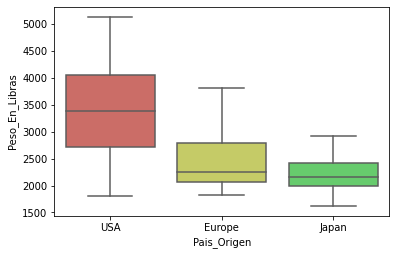

In [36]:
# Colocamos las 2 variable en la funcion
grafico_cajas("Pais_Origen", df_autos, "Peso_En_Libras")

In [37]:
# Funcion de Barras de la media
def grafico_bar(df,Vari1,Vari2):
  histo= pd.crosstab(df[Vari1], df[Vari2].mean()) #crosstab(fila,colum)
  histo.plot.bar()
  plt.show()


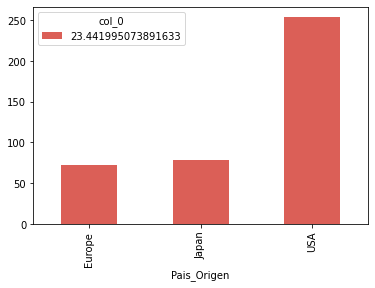

In [38]:
# Escogemos a Pais_Origen y Millas_por_Galon como nuestras variables cualiatativas
grafico_bar(df_autos,"Pais_Origen","Millas_Por_Galon")

In [41]:
# Funcion del histograma con curva
def grafico_hist(df2,valores1):
  sns.set_palette("hls")
  sns.displot(df2[valores1],color="b",bins=30,kde=True)
  plt.show()
  return


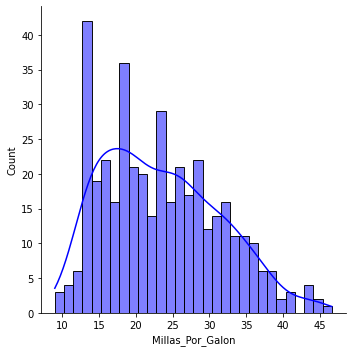

In [42]:
# Escogemos como variables a "Millas_Por_Galon"
grafico_hist(df_autos,"Millas_Por_Galon")

In [51]:
# Mapa de calor
def grafico_calor(data):
  Pais_origen= data["Pais_Origen"]
  Pais_origen.drop_duplicates()
  numpy_pais_origen= Pais_origen.to_numpy()
  listPais= numpy_pais_origen.tolist()
  for i in set(listPais): # Empleamos un ciclo por los paises(diferentes mapas)
    Pais = data[data['Pais_Origen'] == i]
    plt.figure(figsize=(8,6))
    correlacion = Pais.corr()
    plt.title('Tabla de calor de '+i)
    sns.heatmap(correlacion,
    xticklabels = correlacion.columns.values,
    yticklabels = correlacion.columns.values,
    annot = True
            );


In [44]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   406 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  406 non-null    float64
 9   Variable_1         406 non-null    float64
 10  Variable_2         406 non-null    float64
 11  Variable_3         406 non-null    int64  
 12  Variable_4         406 non-null    float64
 13  Variable_5         406 non-null    float64
 14  Variable_Cual_1    406 non-null    object 
 15  Variable_Cual_2    406 non-null    object 
 16  Variable_Cual_3    406 non

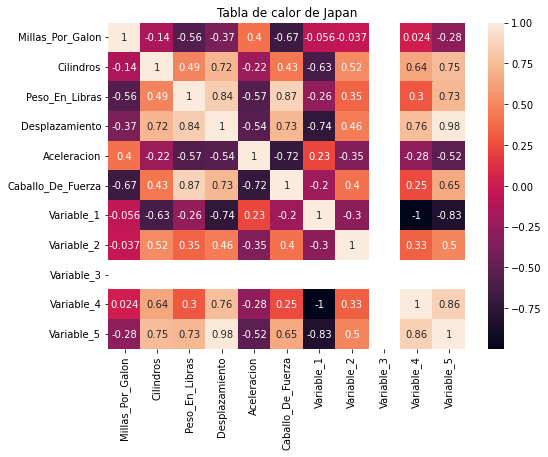

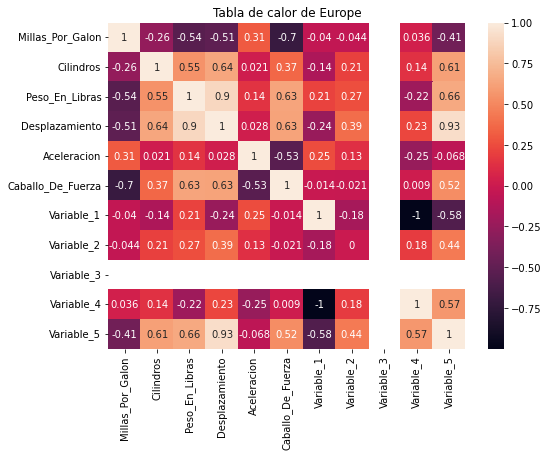

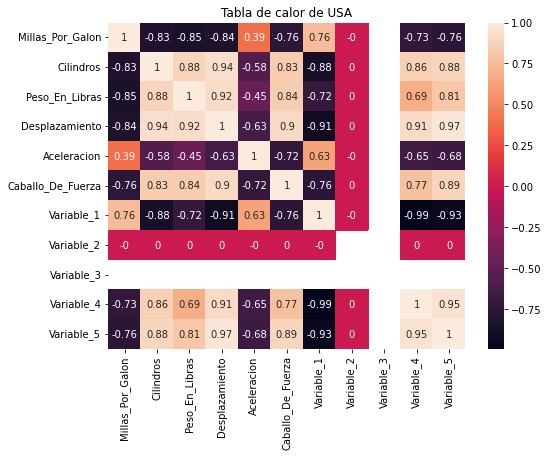

In [52]:
#Especificamos las variables cuantitativas del DataFrame
df_autos_cuant=df_autos.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13]] 
grafico_calor(df_autos_cuant)

